# Desafio 1

In [1]:
import numpy as np
import pandas as pd
import re

link a los datos: http://campus.digitalhouse.com/mod/url/view.php?id=32168

In [2]:
data = pd.read_csv("properatti.csv")

In [3]:
data.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')

Gabi: 

ESTRUCTURA DE UBICACION -> PAIS | PROVINCIA | REGION | CIUDAD | BARRIO
PARA BORRAR -> operation 

Santi: 

PRECIOS -> GENERAR DOS COLUMNAS PRECIOS -> PRICE (USAR price_aprox_usd) | CURRENCY (buscar en title y descripcion en los datos nulos)

Juan:

PRECIOS X MT2 -> DOS COLUMNAS -> PRECIO X MT CUADRADO CUBIERTO (USD) | PRECIO X MT CUADRADO TOTAL (USD) , USANDO COLUMNAS ANTERIORES

Todos:

SACAR DE DESCRIPCION Y TITLE -> CANTIDAD AMBIENTES , M2

In [4]:
pd.set_option('display.max_columns', 500)
pd.options.display.max_colwidth = 10000

#print(data.groupby('expenses')['expenses'].count())
#data['rooms'].isnull().sum()

# Contar y graficar el % de NaN

In [147]:
nulos = data.isnull().sum().sort_values(ascending = False).replace(0, np.nan).dropna() / data.iloc[:,0].count() * 100
nulos

floor                         93.483749
expenses                      88.234615
rooms                         60.905791
price_usd_per_m2              43.394654
lon                           42.525986
lat-lon                       42.525986
lat                           42.525986
surface_total_in_m2           32.443491
price_per_m2                  27.686850
currency                      16.837981
price_aprox_usd               16.837156
price_aprox_local_currency    16.837156
price                         16.837156
surface_covered_in_m2         16.422208
geonames_id                   15.440521
image_thumbnail                2.567233
place_name                     0.018974
description                    0.001650
dtype: float64

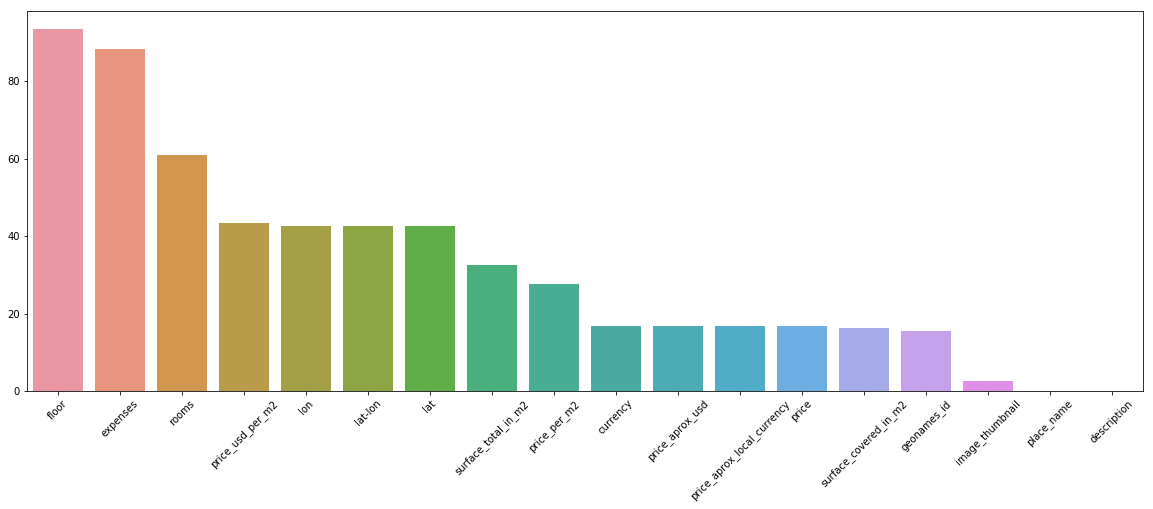

In [148]:
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20,7))
graph = sns.barplot(nulos.index, nulos.values)
graph.set_xticklabels(graph.get_xticklabels() ,rotation=45)
plt.show()

Mismo para capital

In [153]:
nulos_capital = data[data['state_name'] == 'Capital Federal'].isnull().sum().sort_values(ascending = False).replace(0, np.nan).dropna() / data[data['state_name'] == 'Capital Federal'].iloc[:,0].count() * 100
nulos_capital

floor                         90.688823
expenses                      79.601436
rooms                         52.577671
price_usd_per_m2              27.484837
lon                           26.445105
lat-lon                       26.445105
lat                           26.445105
surface_total_in_m2           18.192227
price_per_m2                  15.447456
currency                      10.205471
price_aprox_usd               10.205471
price_aprox_local_currency    10.205471
price                         10.205471
surface_covered_in_m2          7.237901
geonames_id                    3.979453
image_thumbnail                1.510088
dtype: float64

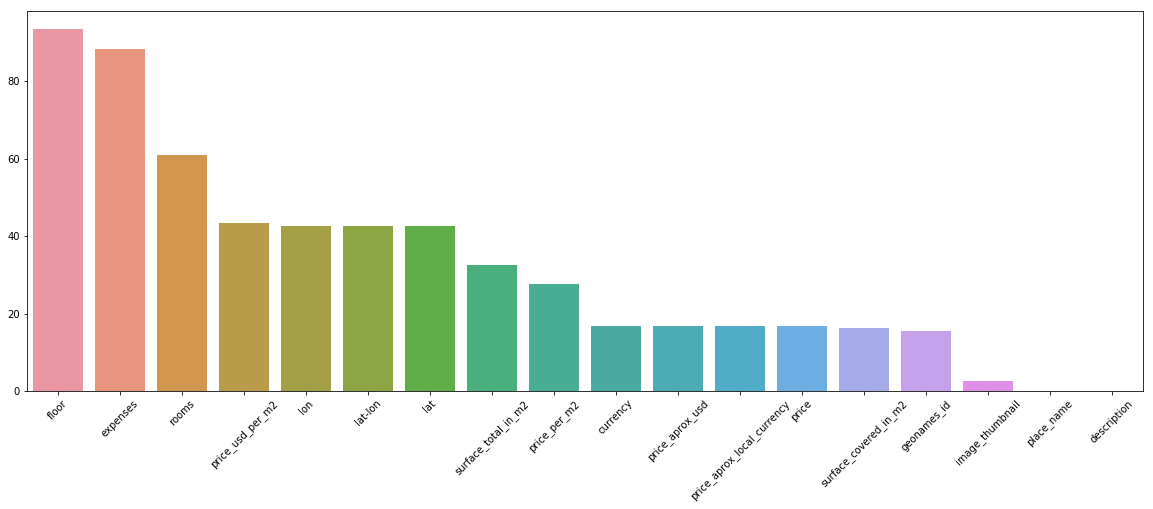

In [154]:
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20,7))
graph = sns.barplot(nulos.index, nulos.values)
graph.set_xticklabels(graph.get_xticklabels() ,rotation=45)
plt.show()

# Calculo del precio por m2 total y cubierto

In [6]:
data["USD_por_m2_total"] = data['price_aprox_usd'] / data['surface_total_in_m2']
data["USD_por_m2_total"].head(10)

0    1127.272727
1            NaN
2    1309.090909
3            NaN
4    1828.571429
5            NaN
6    1226.415094
7    3066.666667
8    3000.000000
9            NaN
Name: USD_por_m2_total, dtype: float64

In [7]:
data["USD_por_m2_cubierto"] = data['price_aprox_usd'] / data['surface_covered_in_m2']
data["USD_por_m2_cubierto"].head(10)

0    1550.000000
1            NaN
2    1309.090909
3            NaN
4    1828.571429
5            NaN
6    1666.666667
7    3450.000000
8    3250.000000
9            NaN
Name: USD_por_m2_cubierto, dtype: float64

# Un modelo de regex para contar características que puedan influir en el precio:

In [28]:
patron = r'(ameni|gimn|gym|laundry|sum|usos mult)'
regex = re.compile(patron, flags=re.IGNORECASE)
data.description.apply(lambda x: bool(regex.search(str(x)))).sum()


25113

# Y acá como ir agregándolas como columnas al dataframe

In [13]:
patron = r'(pileta|pisci)'
regex = re.compile(patron, flags=re.IGNORECASE)
data["pileta"] = 1 * data.description.apply(lambda x: bool(regex.search(str(x))))

In [30]:
patron = r'(ameni|gimn|gym|laundry|sum|usos mult)'
regex = re.compile(patron, flags=re.IGNORECASE)
data["amenities"] = 1 * data.description.apply(lambda x: bool(regex.search(str(x))))

In [15]:
patron = r'(estre)'
regex = re.compile(patron, flags=re.IGNORECASE)
data["a estrenar"] = 1 * data.description.apply(lambda x: bool(regex.search(str(x))))

In [16]:
patron = r'(subte)'
regex = re.compile(patron, flags=re.IGNORECASE)
data["subte"] = 1 * data.description.apply(lambda x: bool(regex.search(str(x))))

# Conseguir dummies de una columna y graficarla:

In [90]:
dummy = pd.get_dummies(data.property_type[data['state_name'] == 'Capital Federal'])
tipo_propiedad = dummy.sum().sort_values(ascending = False)
tipo_propiedad

apartment    27037
house         2087
PH            1828
store         1364
dtype: int64

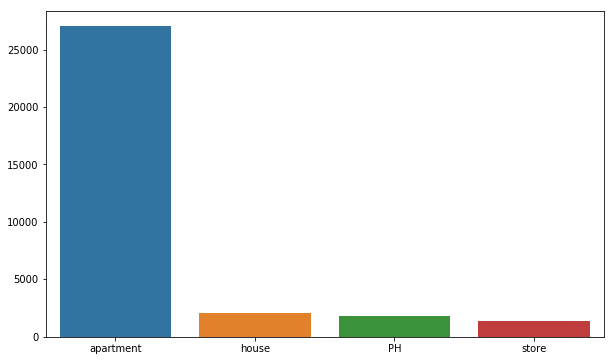

In [91]:
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,6))
graph = sns.barplot(tipo_propiedad.index, tipo_propiedad.values)

In [81]:
#Saqué los de más de 1MU$S porque sino se va de mambo
USD_por_m2_cubierto_CABA = data['USD_por_m2_cubierto'][(data['state_name'] == 'Capital Federal') & (data['USD_por_m2_cubierto'] < 5000)].replace([np.inf, -np.inf], np.nan).dropna()
USD_por_m2_cubierto_CABA.describe()

count    24669.000000
mean      2670.435445
std        829.886053
min          3.208556
25%       2107.142857
50%       2617.647059
75%       3187.500000
max       4999.500000
Name: USD_por_m2_cubierto, dtype: float64

# SANTIAGO - MAPAS:

In [102]:
!pip install geopandas

import pandas as pd
import geopandas
from shapely.geometry import Point
import matplotlib.pyplot as plt

You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [50]:
!pip install descartes
import shapely.wkt

You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [103]:
d = { 'state_name': data.state_name, 'lat': data.lat, 'lon': data.lon, 'price': data.price_aprox_usd }

In [108]:
newdf = pd.DataFrame(d)
newdf = newdf.dropna('index')
newdf_caba = newdf
newdf_caba.head(10)

,lat,lon,price,state_name
0,-34.661824,-58.508839,62000.00,Capital Federal
1,-34.903883,-57.964330,150000.00,Bs.As. G.B.A. Zona Sur
2,-34.652262,-58.522982,72000.00,Capital Federal
3,-34.647797,-58.516424,95000.00,Capital Federal
4,-38.002626,-57.549447,64000.00,Buenos Aires Costa Atlántica
6,-34.532957,-58.521782,130000.00,Bs.As. G.B.A. Zona Norte
7,-34.559873,-58.443362,138000.00,Capital Federal
8,-34.559873,-58.443362,195000.00,Capital Federal
9,-32.942031,-60.725919,25798.49,Santa Fe
10,-31.420083,-64.188776,70000.00,Córdoba


In [109]:
newdf_caba['coordinates'] = list(zip(newdf_caba.lat, newdf_caba.lon))
newdf_caba['coordinates'] = newdf_caba['coordinates'].apply(Point) 

In [111]:
crs = {'init': 'epsg:4326'} # esta es la proyección más común
gdf = geopandas.GeoDataFrame(data=newdf_caba, geometry="coordinates", crs= crs)

In [112]:
barrios_caba = pd.read_csv('barrios.csv', encoding='latin1')
barrios_caba['coordinates'] = barrios_caba['WKT'].apply(shapely.wkt.loads)
barrios_caba = geopandas.GeoDataFrame(barrios_caba, geometry='coordinates', crs=crs)

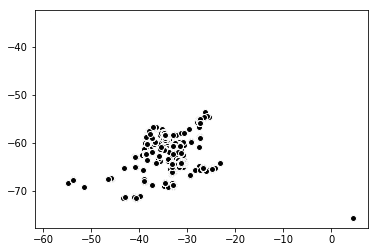

In [119]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
barrios_caba.plot(ax=ax, color='red', edgecolor='white')
gdf.plot(ax=ax, color='black', edgecolor='white')
plt.show();